In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import OneHotEncoder


# Creation of user_df, a DataFrame with informations about Archived Users

users = []

for filepath in glob.iglob('Users/Archived users/*.txt'):
    users.append(filepath[-14:-4])

# print(users)
user_number = len(users)    # number of users

user_df = pd.DataFrame(users, columns = ["Users"])

# Create columns

col_index = []

file = open('Users/Archived users/User_' + str(users[0]) + ".txt")
lines = file.read().split("\n")
ll = len(lines)

for l in range(ll-1):
    sl = lines[l].split(": ", 1)
    col_index.append(sl[0])

# print(col_index)

# Create values

values_list = []
values = []

for i in range(user_number):
    file = open('Users/Archived users/User_' + str(users[i]) + ".txt")
    lines = file.read().split("\n")
    for l in range(ll-1):
        sl = lines[l].split(": ", 1)
        v = sl[1]
        values.append(v)
    values_list.append(values)
    values = []

# Insert values in user_df

value_df = pd.DataFrame(values_list, columns = col_index)

# print (value_df)

user_df = pd.concat([user_df, value_df], axis = 1)

# print(user_df)

# Creation of tappydata_df, a DataFrame with informations about Archived Data

tappydata = []

for filepath in glob.iglob('Data/Tappy Data/*.txt'):
    file = open(filepath)
    lines = file.read().split("\n")
    for l in range(len(lines)-1):
        x = lines[l]
        x = x.split("\t")
        tappydata.append(x)

tappydata_df = pd.DataFrame(tappydata, columns = ["Users", "Date", "Datetime", "TapPosition", "Hold", "Movement", "Latency", "Flight", "*"])

# print(tappydata_df)

all_userdata_df = pd.merge(tappydata_df, user_df, how='inner', left_on='Users', right_on='Users')
#

all_userdata_df = all_userdata_df[all_userdata_df.Impact != "Severe"]
all_userdata_df = all_userdata_df[all_userdata_df.Impact != "Medium"]

all_userdata_df = all_userdata_df[all_userdata_df.Levadopa == "False"]

# counts = all_userdata_df['Users'].value_counts()
# print(counts)


In [2]:
#counts_parkinson = all_userdata_df[all_userdata_df["Parkinsons"] == "True"]
#counts_parkinson.nunique()

# quindi ciamo 34 malati e 55 sani

counts = all_userdata_df['Users'].value_counts()
#avg = all_userdata_df.shape[0] / len(counts)
#print(avg)  # numero medio di tap per ogni utente

#counts.plot(kind = "hist")
#counts.plot(kind = "hist", range = [0, 50])

# togliere da dopo 1000 a ???
# se togliamo i 3 che fanno tanti tap (3/4/5/600 k) Che succede??? quei dati influenzano troppo?

all_userdata_df = all_userdata_df[all_userdata_df['Users'].isin(counts[counts > 1000].index)]
all_userdata_df = all_userdata_df[all_userdata_df['Users'].isin(counts[counts < 100000].index)]

#all_userdata_df.head()

# non leviamo i tap con lo spazio !!!

all_userdata_df = all_userdata_df.drop(["Users", "Date", "Datetime", "Flight", "*", "Tremors", "DiagnosisYear", "Sided", "UPDRS", "Impact", "Levadopa", "DA", "MAOB", "Other"], axis=1)

# completata la pulizia



In [3]:
#print(len(all_userdata_df.loc[158453]))



# counts_Rhold = all_userdata_df[all_userdata_df["Latency"] == 'SOP2REQFUH']
# print(counts_Rhold)
# counts_Rhold.head()
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='01CAXCJIKLYM'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='EF9XEFXPBN'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='01IDYIDJBAXF'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='K2VMDST8HC'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='LSQWWDXEYO'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='04LSQWWDXEYO'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='0NMMGWRY6SO'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='08:27:14.043'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='01QCFNDCZPQH'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='09:11:16.406'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='S9C3TTX3NE'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='SOP2REQFUH'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='05SOP2REQFUH'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='0613.SOP2REQFUH'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='04TL2XHTLK1T'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='12:12:50.477'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='0218.VSBEPFSFWK'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='21:38:52.695'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Latency']=='07YQSGN9BMVK'].index, inplace=True)
all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['BirthYear']==''].index, inplace=True)



In [4]:
# print(all_userdata_df.index[719771])
# sum = 0
# for i in all_userdata_df.index:
#     for j in range(0, all_userdata_df.shape[1]):
#         sum += len(all_userdata_df.iloc[i, j])
#     print (sum)
# sum = 0
# for j in range(0, all_userdata_df.shape[1]):
#     sum += len(all_userdata_df.iloc[719771, j])
# print (sum)



# counts_by = all_userdata_df[all_userdata_df["UPDRS"] == '11:47:33.844	']
# print(counts_by)
# counts_by.head()

# for i in all_userdata_df.index:
#         print iloc[all_userdata_df.index(1), j]

# all_userdata_df.apply(lambda row: row.astype(str).str.contains('11:47:33.844	').any(), axis=1)

In [5]:
#all_userdata_df.head()

# le colonne ora sono: tap position (L/R), Hold, Movement, BirthYear, Gender, Parkinsons (T/F)
# rimuovo gli utenti senza data di nascita, perche mi serve per calcolare l'eta

#all_userdata_df = all_userdata_df[(all_userdata_df.BirthYear != "")]

#all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Hold']=='R'].index, inplace=True)



# normalizzazione
# L/R - Gender - Parkinson : devono diventare campi binari del tipo 0/1
# movement : lo codifichiamo con onehot dividendolo in 4 colonne
# latency - hold : sono dei float
# age (ottenuta da 2017 - birthyear) : int

#all_userdata_df = all_userdata_df.rename(columns = {"TapPosition" : "RightTap"}) ##### perche ci sta anche S

#all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Hold']=='R'].index, inplace=True)
#all_userdata_df.drop(all_userdata_df.loc[all_userdata_df['Hold']=='16:15:50.375'].index, inplace=True)

# RICONTROLLARE PERCHE ESCE LA R SULLA COLONNA HOLD (RIGA 409197)

from sklearn.preprocessing import OneHotEncoder
all_userdata_df.TapPosition.replace(['R', 'L', 'S'], [0, 1, 2], inplace = True)
# va fatto il onehot

all_userdata_df.Movement.replace(['LL', 'LR', 'RR', 'RL', 'LS', 'SL', 'RS', 'SR', 'SS'], [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
# va fatto il onehot

all_userdata_df.Hold = all_userdata_df.Hold.astype(float) # se ci sono problemi e per colpa dei file .txt

# TOGLIERE COMMENTO E CAPIRE PERCHE NON FUNZIONA (CANT CONVERT STRING TO FLOAT)
#counts_ss = all_userdata_df[all_userdata_df["Movement"] == "SS"]

all_userdata_df.Latency = all_userdata_df.Latency.astype(float) # se ci sono problemi e per colpa dei file .txt
# TOGLIERE COMMENTO E CAPIRE PERCHE NON FUNZIONA (CANT CONVERT STRING TO FLOAT)

#all_userdata_df.Flight = all_userdata_df.Flight.astype(float)

all_userdata_df.BirthYear = all_userdata_df.BirthYear.astype(int)
all_userdata_df.BirthYear = 2017 - all_userdata_df.BirthYear
all_userdata_df = all_userdata_df.rename(columns = {"BirthYear" : "Age"}) # perche adesso e espresso in termini di eta

all_userdata_df.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)

all_userdata_df.Parkinsons.replace(['True', 'False'], [1, 0], inplace=True)

all_userdata_df.head()

,TapPosition,Hold,Movement,Latency,Age,Gender,Parkinsons
158453,1,78.1,0,312.5,58,0,0
158454,1,78.1,0,453.1,58,0,0
158455,1,62.5,0,414.1,58,0,0
158456,1,93.8,0,742.2,58,0,0
158457,0,101.6,1,523.4,58,0,0


In [6]:
# onehot di tap position e movement

OneHotTapPosition = pd.get_dummies(all_userdata_df.TapPosition)
OneHotMovement = pd.get_dummies(all_userdata_df.Movement)

OneHotMovement = OneHotMovement.rename(columns = {0: "LL", 1: "LR", 2: "RR", 3: "RL", 4: "LS", 5: "SL", 6: "RS", 7: "SR", 8: "SS"})
all_userdata_df = all_userdata_df.drop(["Movement"], axis=1)

OneHotTapPosition = OneHotTapPosition.rename(columns = {0: "TapR", 1: "TapL", 2: "TapS"})
all_userdata_df = all_userdata_df.drop(["TapPosition"], axis=1)

all_userdata_df = pd.concat([all_userdata_df, OneHotTapPosition, OneHotMovement], axis=1)



In [7]:

#print(all_userdata_df)

# for j in all_userdata_df:
#     print(j)

all_userdata_df = all_userdata_df.reindex(columns = ["Age", "Hold", "Latency", "Gender", "TapR", "TapL", "LL", "LR", "RR", "RL", "LS", "SL", "RS", "SR", "SS", "Parkinsons"])


all_userdata_df.head(20)

# all_userdata_df = all_userdata_df.reindex(columns = ["Age", "Hold", "Latency", "Gender", "Flight", "Temors", "Sided", "DiagnosisYear", "TapR", "TapL", "LL", "LR", "RR", "RL", "LS", "SL", "RS", "SR", "SS", "Parkinsons"])




,Age,Hold,Latency,Gender,TapR,TapL,LL,LR,RR,RL,LS,SL,RS,SR,SS,Parkinsons
158453,58,78.1,312.5,0,0,1,1,0,0,0,0,0,0,0,0,0
158454,58,78.1,453.1,0,0,1,1,0,0,0,0,0,0,0,0,0
158455,58,62.5,414.1,0,0,1,1,0,0,0,0,0,0,0,0,0
158456,58,93.8,742.2,0,0,1,1,0,0,0,0,0,0,0,0,0
158457,58,101.6,523.4,0,1,0,0,1,0,0,0,0,0,0,0,0
158458,58,93.8,203.1,0,1,0,0,0,1,0,0,0,0,0,0,0
158459,58,109.4,289.1,0,0,1,0,0,0,1,0,0,0,0,0,0
158460,58,214.8,316.4,0,1,0,0,1,0,0,0,0,0,0,0,0
158461,58,66.4,382.8,0,1,0,0,0,1,0,0,0,0,0,0,0
158462,58,93.8,562.5,0,0,1,0,0,0,1,0,0,0,0,0,0


In [8]:
x = all_userdata_df.iloc[:, :-1].values
y = all_userdata_df.iloc[:, -1].values

print(x)
print(y)

# ho diviso tutte le colonne (x) dal target parkinsons (y)

[[ 58.   78.1 312.5 ...   0.    0.    0. ]
 [ 58.   78.1 453.1 ...   0.    0.    0. ]
 [ 58.   62.5 414.1 ...   0.    0.    0. ]
 ...
 [ 70.  171.9 343.8 ...   0.    0.    0. ]
 [ 70.  132.8 312.5 ...   0.    0.    0. ]
 [ 70.  109.4 437.5 ...   0.    0.    0. ]]
[0 0 0 ... 1 1 1]


!!! Da qui in poi è solo copiato dal signore di Genova quindi va un po' reinventato

In [9]:
from sklearn.model_selection import train_test_split

# splitto matrice x e array y in sottoinsiemi random di train e test, di dimensioni 4/5 e 1/5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

graph = all_userdata_df.sample(n = 100)
x_graph = graph.iloc[:, 1:3].values
y_graph = graph.iloc[:, -1].values

# print(x_train)
# print(y_train)

# print(x_test)
# print(y_test)

print(x_graph)
print(y_graph)


[[ 78.1 226.6]
 [ 97.7 168. ]
 [ 72.3 302.7]
 [ 97.7 437.5]
 [ 46.9 140.6]
 [ 58.6 343.8]
 [177.  194. ]
 [164.1 359.4]
 [109.4 187.5]
 [ 62.5 328.1]
 [117.2 453.1]
 [ 46.9 125. ]
 [218.8 390.6]
 [ 89.8 328.1]
 [ 70.3 164.1]
 [ 82.  171.9]
 [101.6  97.7]
 [ 97.7 386.7]
 [156.3 312.5]
 [ 62.5  85.9]
 [203.1 343.8]
 [203.1 218.8]
 [130.9 214.8]
 [ 46.9 421.9]
 [ 78.1 140.6]
 [132.8 164.1]
 [ 93.8 171.9]
 [ 93.8  85.9]
 [105.5 191.4]
 [171.9 187.5]
 [ 93.8 281.3]
 [ 78.1  78.1]
 [ 78.1 390.6]
 [105.5 183.6]
 [ 85.9 328.1]
 [156.3 214.8]
 [127.  224.6]
 [207.  195.3]
 [ 15.6 164.1]
 [ 93.8  93.8]
 [ 70.3 160.2]
 [105.5 128.9]
 [ 58.6 238.3]
 [136.7 179.7]
 [109.4 546.9]
 [105.5 277.3]
 [ 97.7 171.9]
 [ 78.1 156.3]
 [ 62.5 234.4]
 [109.4 328.1]
 [109.4 265.6]
 [148.4 367.2]
 [ 93.8 312.5]
 [ 97.7 207. ]
 [ 85.9 714.8]
 [187.5 109.4]
 [125.  472.7]
 [ 93.8 546.9]
 [121.1 375. ]
 [121.1 363.3]
 [101.6 304.7]
 [ 62.5 468.8]
 [140.6 328.1]
 [ 74.2 109.4]
 [140.6 111.3]
 [214.8 335.9]
 [ 31.3 13

In [10]:
# prima del modello di classificazione faccio lo scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_graph = scaler.fit_transform(x_graph)
#proviamo con questo scaler dopo possiamo provare quello normaliza
# len(x_train) 
# len(x_test) = 316643
# len(x_graph) = 100




In [11]:
# matrice di correlazione per curiosita

import seaborn as sns
corr = pd.concat([x, y], axis=1).corr()
corr_values = corr.iloc[:,15].values
print("Massima correlazione positiva con il target:", np.max(corr_values[0:corr_values.size-1]))
print("Massima correlazione negativa con il target:", np.min(corr_values))
print(pd.concat([x, y], axis=1).columns[abs(corr_values) < 0.01]) 

plt.figure(figsize=(15, 16), dpi=160)
sns.heatmap(pd.concat([x, y], axis=1).corr(), cmap="bwr")


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

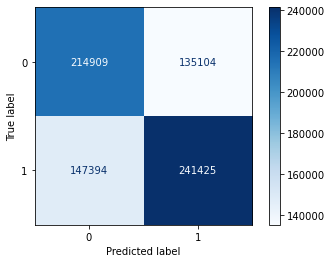

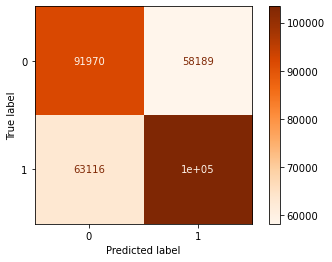

In [23]:

# qua si parte con il learning
# pero il ragazzo di Genova dice che x_train e x_test hanno troppe righe
# allora si riduce le dimensioni del dataset prendendo il 4% (applica test_size = 0.2 per due volte)

#############

from sklearn.linear_model import LogisticRegression

classifierLogReg = LogisticRegression(random_state = 0)
classifierLogReg.fit(x_train, y_train)

#The algorithm has learnt on training set, now I will predict the outcomes on test set
y_pred_LogReg0 = classifierLogReg.predict(x_train)
y_pred_LogReg = classifierLogReg.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# ogni riga e un'istanza della classe vera
# e la matrice TP FP TN FN
CM_LogReg0 = confusion_matrix(y_train, y_pred_LogReg0)
PercLogReg0 = (CM_LogReg0[0,0]+CM_LogReg0[1,1])/CM_LogReg0.sum()

CM_LogReg = confusion_matrix(y_test, y_pred_LogReg)
PercLogReg = (CM_LogReg[0,0]+CM_LogReg[1,1])/CM_LogReg.sum()
# print(CM_LogReg)
# print(CM_LogReg0)

# print(PercLogReg)
# print(PercLogReg0)

cmd0 = ConfusionMatrixDisplay(CM_LogReg0)
cmd = ConfusionMatrixDisplay(CM_LogReg)

cmd0.plot(cmap = "Blues")
cmd.plot(cmap = "Oranges")


#visual
# from matplotlib.colors import ListedColormap

# classifierLogReg_graph = LogisticRegression(random_state = 0)
# classifierLogReg_graph.fit(x_graph, y_graph)

# X_set, y_set = x_graph, y_graph
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.figure(1)
# plt.contourf(X1, X2, classifierLogReg_graph.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression')
# plt.xlabel('Latency')
# plt.ylabel('Hold')
# plt.legend()
# plt.show()




In [ ]:
# Naive Bayes classification

from sklearn.naive_bayes import GaussianNB
classifierBAYES = GaussianNB()
classifierBAYES.fit(x_train, y_train)

y_pred_BAYES0 = classifierBAYES.predict(x_train)
y_pred_BAYES = classifierBAYES.predict(x_test)

CM_BAYES0 = confusion_matrix(y_train, y_pred_BAYES0)
PercBAYES0 = (CM_BAYES0[0,0]+CM_BAYES0[1,1])/CM_BAYES0.sum()

CM_BAYES = confusion_matrix(y_test, y_pred_BAYES)
PercBAYES = (CM_BAYES[0,0]+CM_BAYES[1,1])/CM_BAYES.sum()

0.827243541156853
0.8275407951541641


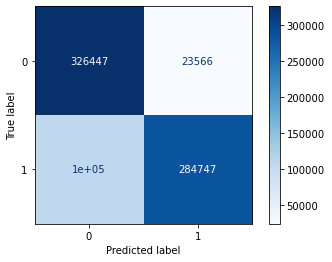

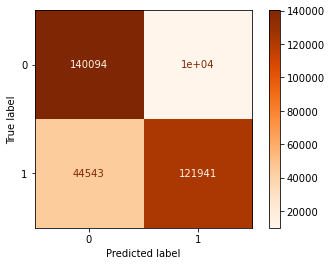

In [24]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier
classifierTREE = DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 5, random_state = 0)
classifierTREE.fit(x_train, y_train)

# provare la profondita e capire perche

y_pred_TREE = classifierTREE.predict(x_test)
y_pred_TREE0 = classifierTREE.predict(x_train)

CM_TREE0 = confusion_matrix(y_train, y_pred_TREE0)
PercTREE0 = (CM_TREE0[0,0]+CM_TREE0[1,1])/CM_TREE0.sum()

CM_TREE = confusion_matrix(y_test, y_pred_TREE)
PercTREE = (CM_TREE[0,0]+CM_TREE[1,1])/CM_TREE.sum()

cmd0 = ConfusionMatrixDisplay(CM_TREE0)
cmd = ConfusionMatrixDisplay(CM_TREE)
cmd0.plot(cmap = "Blues")
cmd.plot(cmap = "Oranges")

print(PercTREE0)
print(PercTREE)


0.9733186976200273
0.9507110531418664


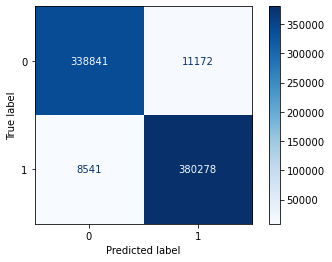

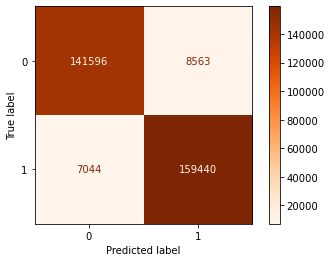

In [25]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier
classifierFOR = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierFOR.fit(x_train, y_train)

y_pred_FOR0 = classifierFOR.predict(x_train)
y_pred_FOR = classifierFOR.predict(x_test)

CM_FOR0 = confusion_matrix(y_train, y_pred_FOR0)
PercFOR0 = (CM_FOR0[0,0]+CM_FOR0[1,1])/CM_FOR0.sum()

CM_FOR = confusion_matrix(y_test, y_pred_FOR)
PercFOR = (CM_FOR[0,0]+CM_FOR[1,1])/CM_FOR.sum()

cmd0 = ConfusionMatrixDisplay(CM_FOR0)
cmd = ConfusionMatrixDisplay(CM_FOR)
cmd0.plot(cmap = "Blues")
cmd.plot(cmap = "Oranges")

print(PercFOR0)
print(PercFOR)

In [ ]:
# DIMINUIRE LA CARDINALITA DEI SET

In [ ]:
# SVM to fit algorithm

from sklearn.svm import SVC
classifierSVC = SVC(kernel = 'rbf', random_state = 0)
classifierSVC.fit(x_train, y_train)

y_pred_SVMK0 = classifierSVC.predict(x_train)
y_pred_SVMK = classifierSVC.predict(x_test)

CM_SVMK0 = confusion_matrix(y_train, y_pred_SVMK0)
PercSVMK0 = (CM_SVMK0[0,0]+CM_SVMK0[1,1])/CM_SVMK0.sum()

CM_SVMK = confusion_matrix(y_test, y_pred_SVMK)
PercSVMK = (CM_SVMK[0,0]+CM_SVMK[1,1])/CM_SVMK.sum()

In [ ]:
# KNN to fit algorithm

from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(x_train, y_train)

y_pred_KNN0 = classifierKNN.predict(x_train)
y_pred_KNN = classifierKNN.predict(x_test)

CM_KNN0 = confusion_matrix(y_train, y_pred_KNN0)
PercKNN0 = (CM_KNN0[0,0]+CM_KNN0[1,1])/CM_KNN0.sum()

CM_KNN = confusion_matrix(y_test, y_pred_KNN)
PercKNN = (CM_KNN[0,0]+CM_KNN[1,1])/CM_KNN.sum()

In [17]:
# altri metodi : chi piu ne ha piu ne metta

0.9039754639755723
0.8983429287873094


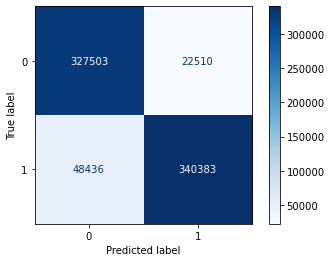

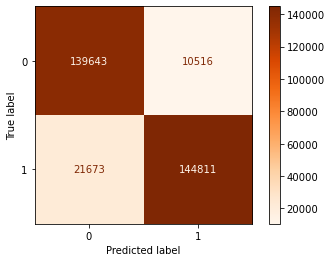

In [26]:
# Ensemble voting

from sklearn.ensemble import VotingClassifier
Models = []
#Models.append(('KNN', classifierKNN))
#Models.append(('SVC', classifierSVC))
Models.append(('Tree', classifierTREE))
Models.append(('Forest', classifierFOR))
Models.append(('Logistic', classifierLogReg))

ensemble = VotingClassifier(Models)
ensemble = ensemble.fit(x_train, y_train)

y_pred_ENS0 = ensemble.predict(x_train)
y_pred_ENS = ensemble.predict(x_test)

CM_ENS0 = confusion_matrix(y_train, y_pred_ENS0)
PercENS0 = (CM_ENS0[0,0]+CM_ENS0[1,1])/CM_ENS0.sum()

CM_ENS = confusion_matrix(y_test, y_pred_ENS)
PercENS = (CM_ENS[0,0]+CM_ENS[1,1])/CM_ENS.sum()

cmd0 = ConfusionMatrixDisplay(CM_ENS0)
cmd = ConfusionMatrixDisplay(CM_ENS)
cmd0.plot(cmap = "Blues")
cmd.plot(cmap = "Oranges")

print(PercENS0)
print(PercENS)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


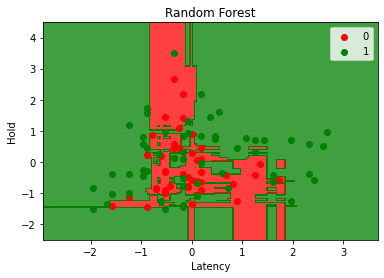

In [14]:
##### Parte dedicata alla visualizzazione (plot, grafici ecc)

# mago forest visualization
from matplotlib.colors import ListedColormap

classifierFOR_graph = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierFOR_graph.fit(x_graph, y_graph)

X_set, y_set = x_graph, y_graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(4)
plt.contourf(X1, X2, classifierFOR_graph.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest')
plt.xlabel('Latency')
plt.ylabel('Hold')
plt.legend()
plt.show()